In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from cross_val_tool import cross_validation
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
order_history = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/OrderFrequency.csv')

In [15]:
order_history.head(10)

,Mr Order Order ID,Mr Order Subscriber Before Order Date (Yes / No),Mr Order Capture Month,Mr Order Items Subscription Frequency,User Sub Facts Days to First Sub Tiered,User Sub Facts Is Active Sub (Yes / No),Mr User User ID,User Nps Facts Last Nps Response,User Nps Facts First Nps Response,User Order Facts First Order Month,Mr Order Items Product Code
0,101517387,Yes,2017-06,6.0,"(-inf,1.0)",Yes,1065966.0,NaN,NaN,2017-02,7NGV
1,101565713,Yes,2017-07,0.0,"(-inf,1.0)",Yes,822465.0,10.0,10.0,2016-08,41006
2,101176091,Yes,2016-11,0.0,"(-inf,1.0)",No,534863.0,10.0,10.0,2015-08,30030
3,100939361,Yes,2016-06,0.0,"(-inf,1.0)",Yes,658160.0,NaN,NaN,2016-01,6NRR
4,101004385,Yes,2016-07,0.0,"(-inf,1.0)",No,696781.0,5.0,10.0,2016-03,7NGV
5,101068796,Yes,2016-09,0.0,"(-inf,1.0)",Yes,801713.0,10.0,10.0,2016-07,5NGM
6,101213861,Yes,2016-12,3.0,"(-inf,1.0)",No,562299.0,10.0,9.0,2015-09,9NA
7,100705809,Yes,2015-10,0.0,"(-inf,1.0)",Yes,225501.0,10.0,10.0,2014-09,4NGV
8,100969330,Yes,2016-07,0.0,"(-inf,1.0)",No,450859.0,10.0,10.0,2015-06,6NRR
10,101284937,Yes,2017-02,4.0,"(-inf,1.0)",No,931546.0,NaN,NaN,2016-11,8NGV


In [8]:
order_history[['Mr Order Items Product Code']] = order_history[['Mr Order Items Product Code']].replace('[\$,]','',regex=True)
exclude_purchased_rows = order_history['Mr Order Items Product Code'].str.contains('^cc')
order_history = order_history[~exclude_purchased_rows]
order_history = order_history[order_history['Mr User User ID'].notnull()]
order_history.drop(['User Visit Facts User ID'], axis=1, inplace=True)

In [64]:
order_history['Mr Order Subscriber Before Order Date (Yes / No)'].value_counts()

Yes    635764
No     430069
Name: Mr Order Subscriber Before Order Date (Yes / No), dtype: int64

In [65]:
order_history['User Sub Facts Is Active Sub (Yes / No)'].value_counts()

No     572058
Yes    493775
Name: User Sub Facts Is Active Sub (Yes / No), dtype: int64

In [38]:
orders_subs_by_user = order_history[['Mr User User ID','Mr Order Items Product Code','Mr Order Order ID']].groupby(by=['Mr User User ID']).count()
orders_subs_by_user['Mr Order Order ID'].mean()

4.607353901086313

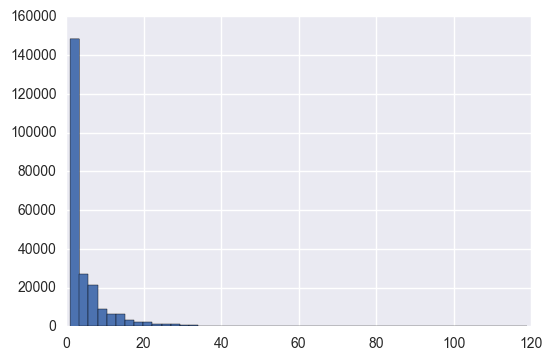

In [41]:
plt.hist(orders_subs_by_user['Mr Order Order ID'], bins = 50)
plt.show()

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x131674bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x13167e910>,
 'fliers': [<matplotlib.lines.Line2D at 0x132ddac10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x132dda5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1139224d0>,
  <matplotlib.lines.Line2D at 0x13167e410>]}

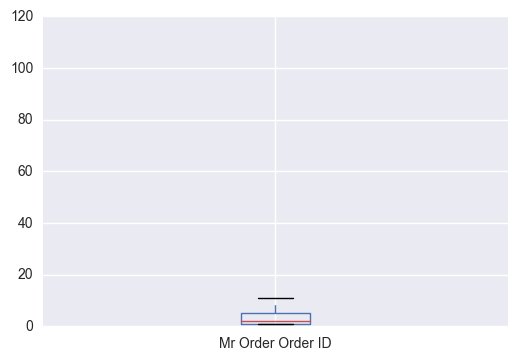

In [63]:
orders_subs_by_user.boxplot(column=['Mr Order Order ID'])

In [34]:
order_date_by_user = pd.Series(order_history['Mr Order Capture Month'].values,index=order_history['Mr User User ID']).to_dict()

In [43]:
sub_history = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/Sub_id_lifetime_order.csv')

In [44]:
sub_history.head()

,Mr Subscription Subscription ID,Mr User User ID,User Order Facts Lifetime Number of Orders Tier,User Order Facts Lifetime Orders,User Order Facts Lifetime Revenue,User Order Facts Months As Customer,User Order Facts Repeat Customer (Yes / No),User Order Facts First Order Type
0,129456,1159377,Below 2,1,19.95,0.0,No,subscription
1,130079,1162150,Below 2,1,24.95,0.0,No,subscription
2,130059,1162030,Below 2,1,84.80,0.0,No,subscription
3,122025,1059649,Below 2,1,19.95,0.0,No,subscription
4,146021,1229140,Below 2,1,52.85,0.0,No,subscription


In [45]:
sub_history['User Order Facts Repeat Customer (Yes / No)'].value_counts()

Yes    129121
No      21169
Name: User Order Facts Repeat Customer (Yes / No), dtype: int64

In [72]:
#plt.hist(sub_history['User Order Facts Months As Customer'])

<Container object of 71 artists>

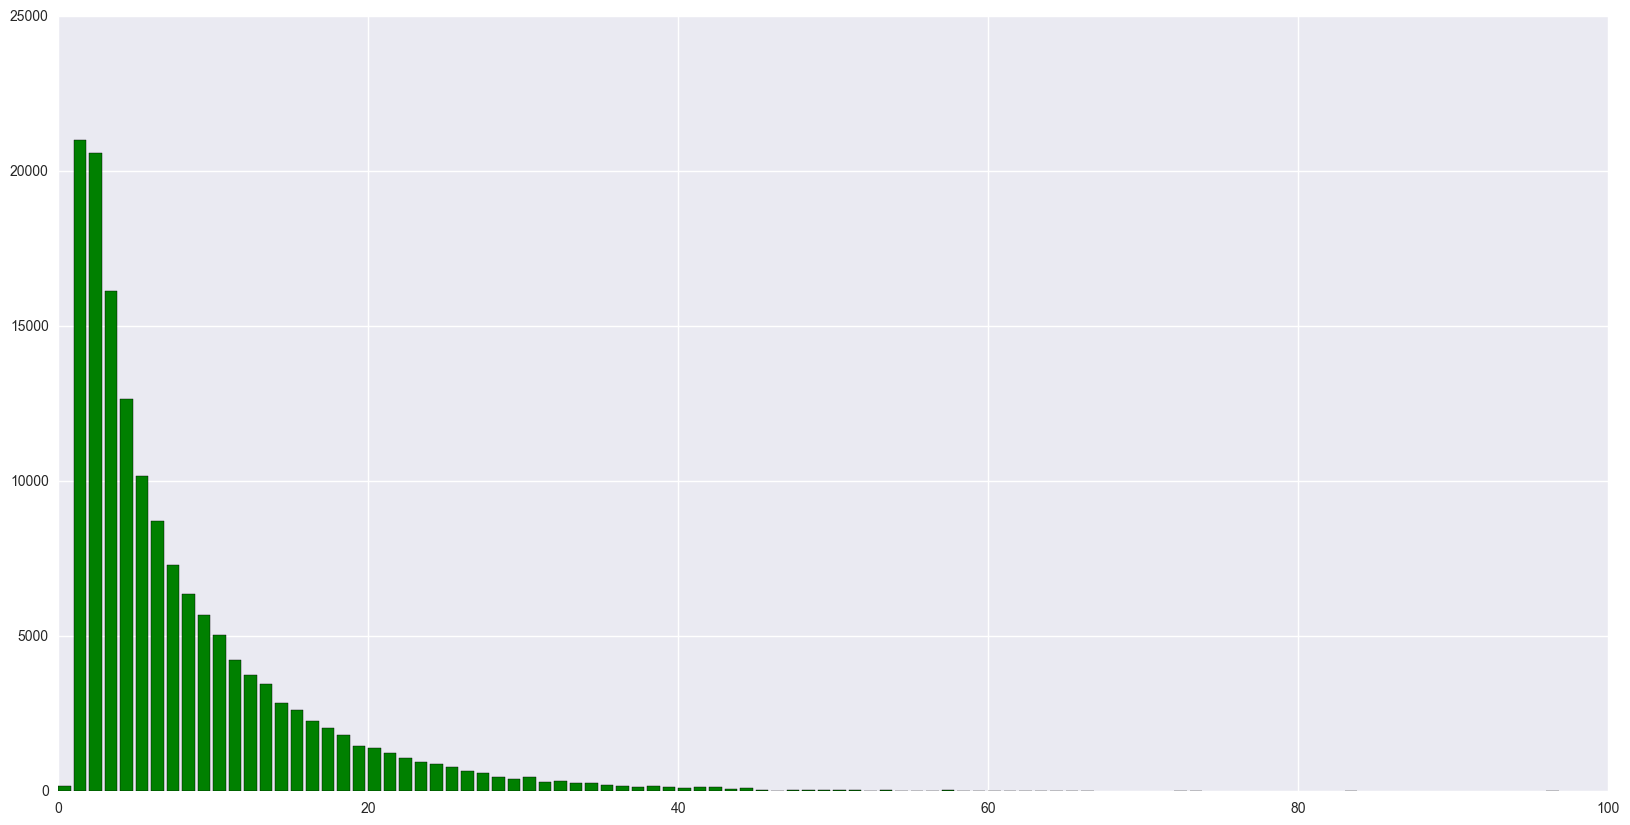

In [77]:
order_count_subs = sub_history['User Order Facts Lifetime Orders'].value_counts().to_dict()
order_count_subs
plt.figure(figsize=(20,10))
plt.bar(order_count_subs.keys(), order_count_subs.values(), color='g')


In [55]:
user_rev_per_order = sub_history[['Mr User User ID','User Order Facts Lifetime Orders','User Order Facts Lifetime Revenue']]

In [58]:
from __future__ import division

user_rev_per_order['avg_order'] = user_rev_per_order['User Order Facts Lifetime Revenue']/ user_rev_per_order['User Order Facts Lifetime Orders']
user_rev_per_order['avg_order']

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0         19.950000
1         24.950000
2         84.800000
3         19.950000
4         52.850000
5         19.950000
6         19.950000
7         32.900000
8         19.950000
9         24.950000
10        19.950000
11        34.950000
12        30.370000
13        19.950000
14        19.950000
15        29.950000
16        17.950000
17        17.950000
18        34.950000
19         4.950000
20        27.900000
21        19.950000
22        84.800000
23        56.900000
24        29.950000
25        19.950000
26        47.850000
27        24.950000
28        29.950000
29        19.950000
            ...    
150260    17.262000
150261    25.783333
150262    45.286154
150263    28.640000
150264    30.108000
150265    24.450000
150266    25.643889
150267    27.613667
150268    29.253333
150269    38.041500
150270    24.950000
150271    27.400000
150272    26.740000
150273    25.955455
150274    36.158000
150275    24.950000
150276    40.736364
150277    30.443750
150278    23.950000


In [78]:
#plt.hist(user_rev_per_order['avg_order'], bins=20)

In [80]:
days_between_orders = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/days_between_orders.csv')
days_between_orders.head()

,Mr Order Days Between Orders,Mr Order Order ID,Mr Order Items Order Item Type,User Visit Facts User ID,Mr Order First Order (Yes / No)
0,NaN,100508728,one-time,354444.0,Yes
1,NaN,101295738,one-time,1056539.0,Yes
2,NaN,101303354,one-time,985342.0,Yes
3,NaN,101495038,one-time,1202455.0,Yes
4,NaN,101514889,subscription,1211637.0,Yes


<Container object of 991 artists>

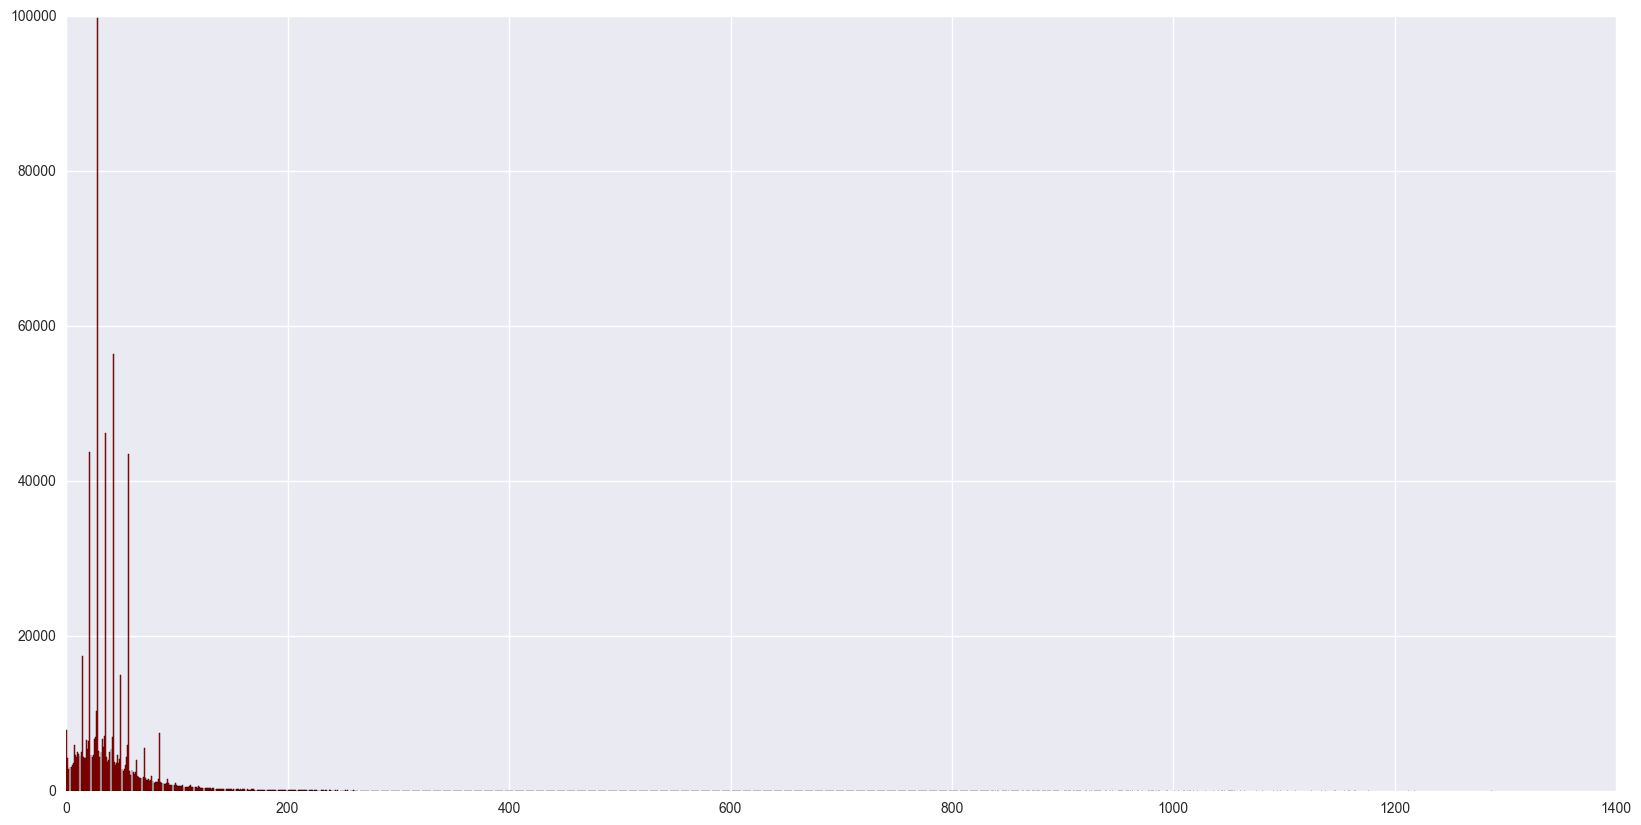

In [85]:
days_dist = days_between_orders['Mr Order Days Between Orders'].value_counts().to_dict()
plt.figure(figsize=(20,10))
plt.bar(days_dist.keys(), days_dist.values(), color='r')

In [89]:
print "max days between orders is: " + str(days_between_orders['Mr Order Days Between Orders'].max())
print "min days between orders is: " + str(days_between_orders['Mr Order Days Between Orders'].min())
print "mean days between orders is: " + str(days_between_orders['Mr Order Days Between Orders'].mean())
print "median days between orders is: " + str(days_between_orders['Mr Order Days Between Orders'].median())

max days between orders is: 1287.0
min days between orders is: 0.0
mean days between orders is: 50.7117155813
median days between orders is: 35.0
